In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from strategy_implementation import profit_loss_balance, final_balance

df = pd.read_csv("Trade_18_19.csv")
df_label = pd.read_csv("TSLA_weekly_return_volatility.csv")

In [2]:
# 2018 true labels for testing
df_label18 = df_label.loc[df_label["Year"] == 2018].reset_index()
label_list = df_label18["label"].values

# prepare 2018 data
df18 = df.loc[df["Year"] == 2018].reset_index()
grouped_df18 = df18.groupby("Week_Number").tail(1)
x = grouped_df18["Week_Number"].values
y = grouped_df18["Adj Close"].values

In [3]:
def polynomial_model(x, y, degree, w_week):
    predicted_labels=[]
    for week in x:
        start = week
        end = w_week + week
        if end > x[-1]:
            break

        test_x = x[end]
        train_x = x[start:end]
        train_y = y[start:end]
        weights = np.polyfit(train_x, train_y, degree)
        model = np.poly1d(weights)
        predict_y = model(test_x)
        
        if predict_y > train_y[-1]:
            predicted_labels.append("green")
        elif predict_y < train_y[-1]:
            predicted_labels.append("red")
        else:
            predicted_labels.append(predicted_labels[-1])
    return np.array(predicted_labels)

def degree_accuracy(w_week, predicted_labels):
    predict_start = w_week + 1
    test_y = label_list[predict_start:]
    correct = 0
    for i in range(len(test_y)):
        if predicted_labels[i] == test_y[i]: 
            correct += 1
    accuracy = correct / len(test_y)
    return round(accuracy,2)
  

## 1. Plot W accuracy for each degree

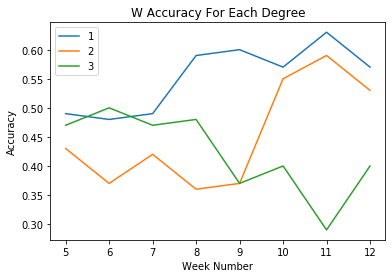

In [4]:
degree_list = [1, 2, 3]
w_list = [i for i in range(5,13)] # W week

plt.xlabel("Week Number")
plt.ylabel("Accuracy")
plt.title("W Accuracy For Each Degree")

for d in degree_list:
    acc_list = []
    for w in w_list:
        predictions = polynomial_model(x, y, d, w)
        acc = degree_accuracy(w, predictions)
        acc_list.append(acc)
    plt.plot(w_list, acc_list, label=d)
plt.legend()
plt.show()

For degree 1, the best W is 11;
For degree 2, the best W is 11;
For degree 3, the best W is 6.

## 2. Use the best W for each degree to predict labels for 2019

In [5]:
# prepare 2019 data
df19 = df.loc[df["Year"] == 2019].reset_index()
grouped_df19 = df19.groupby("Week_Number").tail(1)
x_19 = grouped_df19["Week_Number"].values
y_19 = grouped_df19["Adj Close"].values

# 2019 true labels for testing
df_label19 = df_label.loc[df_label["Year"] == 2019].reset_index()
label_list19 = df_label19["label"].values

# degree 1
d_1 = 1 
w_1 = 11
prediction_1 = polynomial_model(x_19, y_19, d_1, w_1)
acc_1 = degree_accuracy(w_1, prediction_1)
print(f"Accuracy for degree 1 and W 7 is {acc_1}.")

# degree 2
d_2 = 2 
w_2 = 11
prediction_2 = polynomial_model(x_19, y_19, d_2, w_2)
acc_2 = degree_accuracy(w_2, prediction_2)
print(f"Accuracy for degree 2 and W 12 is {acc_2}.")

# degree 3
d_3 = 3 
w_3 = 6
prediction_3 = polynomial_model(x_19, y_19, d_3, w_3)
acc_3 = degree_accuracy(w_3, prediction_3)
print(f"Accuracy for degree 3 and W 6 is {acc_3}.")

Accuracy for degree 1 and W 7 is 0.59.
Accuracy for degree 2 and W 12 is 0.46.
Accuracy for degree 3 and W 6 is 0.63.


## 3. Compute confusion matrices (for each d) for 2019

In [6]:
cm_1 = confusion_matrix(label_list19[w_1:], prediction_1)
cm_2 = confusion_matrix(label_list19[w_2:], prediction_2)
cm_3 = confusion_matrix(label_list19[w_3:], prediction_3)
print("Confusion matrix for degree 1:\n", cm_1,
     "\nConfusion matrix for degree 2:\n", cm_2,
     "\nConfusion matrix for degree 3:\n", cm_3)

Confusion matrix for degree 1:
 [[ 8 14]
 [ 9 11]] 
Confusion matrix for degree 2:
 [[12 10]
 [ 8 12]] 
Confusion matrix for degree 3:
 [[12 10]
 [13 12]]


## 4. Implement the three trading strategies

In [7]:
invest = 100
def green_week_number(prediction):
    week_num = [i for i, e in enumerate(prediction) if e == "green"]
    return week_num

# degree 1
green_week_1 = green_week_number(prediction_1)
pb_1 = profit_loss_balance(df19, invest, green_week_1)
final_value_1 = final_balance(pb_1)
print("Final value for degree 1 linear model is", final_value_1)

# degree 2
green_week_2 = green_week_number(prediction_2)
pb_2 = profit_loss_balance(df19, invest, green_week_2)
final_value_2 = final_balance(pb_2)
print("Final value for degree 2 linear model is", final_value_2)

# degree 3
green_week_3 = green_week_number(prediction_3)
pb_3 = profit_loss_balance(df19, invest, green_week_3)
final_value_3 = final_balance(pb_3)
print("Final value for degree 3 linear model is", final_value_3)

Final value for degree 1 linear model is 81.6
Final value for degree 2 linear model is 79.26
Final value for degree 3 linear model is 112.99


From the final value of three strategy implementations, the polynomial model is not very positive for stock trading. 